# ADM Homework 5

## 1 - Data

Let's take a first look at the data.

We have three files describing links in graphs, with their timestamps.

```
micf@MacBook-Pro-di-Michele ADM % wc -l ./ADM_HW5/datasets/sx-stackoverflow-a2q.txt
 17823525 ./ADM_HW5/datasets/sx-stackoverflow-a2q.txt
micf@MacBook-Pro-di-Michele ADM % wc -l ./ADM_HW5/datasets/sx-stackoverflow-c2a.txt
 25405374 ./ADM_HW5/datasets/sx-stackoverflow-c2a.txt
micf@MacBook-Pro-di-Michele ADM % wc -l ./ADM_HW5/datasets/sx-stackoverflow-c2q.txt
 20268151 ./ADM_HW5/datasets/sx-stackoverflow-c2q.txt
```

The total number of links is ~63M, which we'll need to merge in a single graph

```
micf@MacBook-Pro-di-Michele ADM % head ./ADM_HW5/datasets/sx-stackoverflow-c2q.txt
4550 4550 1220729190
242 184 1220733503
4213 4946 1220768149
91 91 1220768295
2658 1874 1220771891
4035 1874 1220773037
2257 4489 1220802041
577 577 1220834891
4489 4489 1220853536
828 2783 1220854143
```

The file is a CSV-like format, where spaces are used as separators. For each row, the user that commented/answered, the user who posted the question/answer being replied to, and the timestamp of the interaction (UNIX timestamp in seconds) are provided.

Since the files end with newlines, we can just append them together to get our final graph and do actual pre-processing on everything at once.

```
micf@MacBook-Pro-di-Michele ADM % cat ./ADM_HW5/datasets/sx-stackoverflow-c2q.txt ./ADM_HW5/datasets/sx-stackoverflow-c2a.txt ./ADM_HW5/datasets/sx-stackoverflow-a2q.txt > ./ADM_HW5/datasets/merged_graph.txt
micf@MacBook-Pro-di-Michele ADM % wc -l ./ADM_HW5/datasets/merged_graph.txt
 63497050 ./ADM_HW5/datasets/merged_graph.txt
```

Now, depending on the functionality, we can load one of the three sub-graphs, or the complete graph, as we deem fit.

## 2 & 3 - Functionalities

### Functionality 1

In [1]:
from functionality_utils import functionality_1

functionality_1()

,Value
Is Directed,True
# Users,1148384
# Links,15801794
Avg. Links per User,13.760026
Density,0.000012
Is Sparse,True


The above was run by inputting the A2Q graph.

For the sake of clarity, we'll use a reduced version of the graph for functionalities 2-4 but of course the algorithms work also on the complete graph.

### Functionality 2

Since most of the metrics' algorithms have a high complexity, we'll run them on predefined graphs, while leaving the option to run them on the complete graph.

Chosen metric: Betweenness
Chosen node: 1
Betweenness: 0.13131313131313133


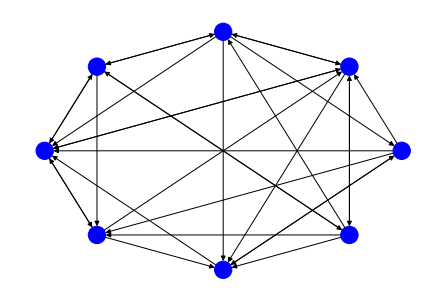

In [1]:
from functionality_utils import functionality_2
from graph_utils import random_graph

functionality_2(on_graph=random_graph(10, 0.5))

Chosen metric: Centrality
Chosen node: 1
Centrality: 10


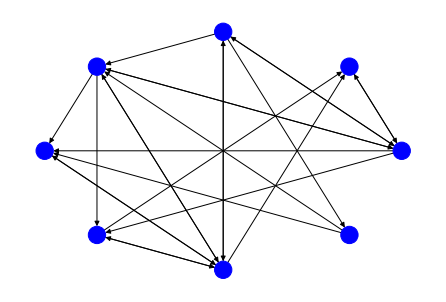

In [2]:
functionality_2(on_graph=random_graph(10, 0.5))

Chosen metric: Closeness
Chosen node: 1
Closeness: 0.16666666666666666


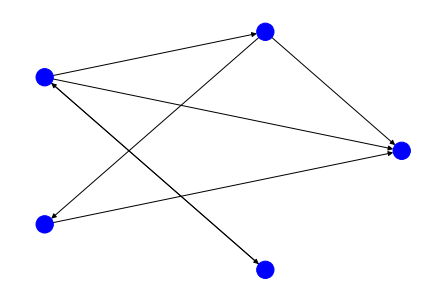

In [3]:
functionality_2(on_graph=random_graph(10, 0.5))

Chosen metric: PageRank
Chosen node: 1
PageRank: 0.11168361496496695


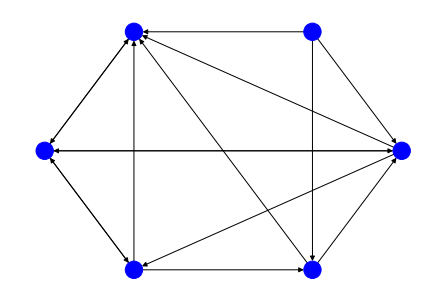

In [2]:
functionality_2(on_graph=random_graph(10, 0.5))

### Functionality 3

The functionality requires to show the shortest walk connecting an (ordered) series of nodes.

The algorithm is implemented by running Dijkstra's algorithm on all consecutive pairs of nodes in the provided list. These sub-paths are then concatenated to make the complete walk.

Graph file: datasets/merged_graph.txt
Nodes to traverse: [1, 1288, 7287]


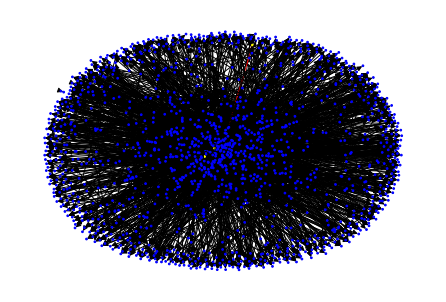

In [1]:
from functionality_utils import functionality_3

functionality_3()

We _can_ see a shortest path there, but even with the reduced number of node/edges it is still way too populated to get a meaningful plot.

Let's try with a simpler graph to make sure everything is fine:

Nodes to traverse: [1, 9, 3, 7]
Walk: [1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 3, 4, 5, 6, 7]


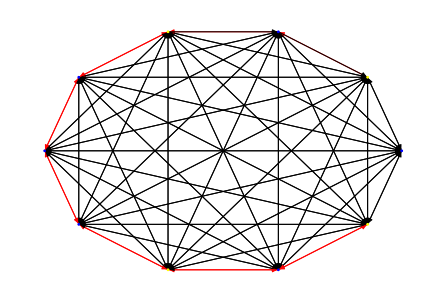

In [1]:
from functionality_utils import functionality_3
from graph_utils import example_graph

functionality_3(on_graph=example_graph())

Yay! Especially by looking at the walk's nodes list it is clear that moving along consecutive nodes (i.e. 1 to 2, 2 to 3 and so on) works better because of how the graph was defined.

### Functionality 4

Here the meaning behind requesting *both* two time intervals _and_ two users was not super clear.

The implementation provided here solves the following problem:

"Given two users, find a minimum (by total weight) set of edges that, if removed, disconnects the two users in the graph."

In particular, we will work on a directed graph, so that, given two users/nodes, we'll only make it impossible to go from the first to the second, but not necessarily the opposite.

Graph file: datasets/merged_graph.txt
Source: 1, Target: 7287
Min cut: [(11410, 9021), (4279, 115), (4003, 3333), (4926, 3333), (1, 17389), (1, 2603), (1, 11410), (4279, 4977), (1, 267), (1, 1574), (1, 1853), (11256, 8741)]


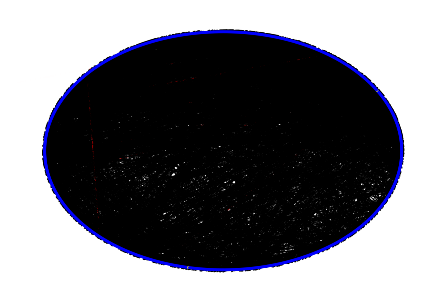

In [1]:
from functionality_utils import functionality_4
from graph_utils import example_graph

functionality_4()

Understandably a mess. As before, let's also run it on a simpler graph.

Source: 2, Target: 8
Min cut: [(2, 3), (4, 5), (6, 7), (2, 4), (2, 1), (5, 6), (7, 8), (2, 5), (0, 1), (6, 8), (2, 0), (6, 5), (9, 8), (4, 3), (2, 8), (6, 4), (3, 5), (7, 5), (3, 4), (6, 3), (7, 4), (6, 9), (7, 9), (7, 3), (1, 4), (5, 8), (1, 3), (1, 0), (5, 4), (2, 6), (4, 8), (5, 3), (7, 6), (0, 3), (2, 7), (3, 8), (9, 5), (9, 6), (4, 1), (9, 7), (3, 1), (4, 6), (4, 0), (3, 0), (2, 9)]


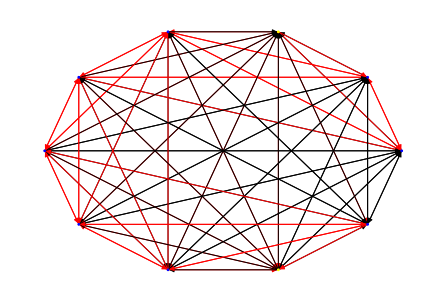

In [2]:
functionality_4(on_graph=example_graph())

## Algorithmic Question

The problem asks to assign a set of students to one of dormitories so that given pairs of students are not in the same dormitory.

The problem can be modeled as a graph 2-coloring, where we build a graph such that:
- The nodes are the students
- An edge ($p_i$, $p_j$) exists if and only if students $p_i$ and $p_j$ have to be assigned to different dormitories.

Graph 2-coloring is an extension of traditional DFS/BFS (DFS is implemented here) and keeps its complexity of O(n+k), with n being the number of nodes in the graph and k the number of edges.

Here is an implementation of the solution:

In [2]:
from typing import Optional

def assign_students(num_nodes: int, edges: list[tuple[int, int]]) -> Optional[list[int]]:
    """
    Return a list where the i-th element is 0 if the i-th student is assigned to the first dormitory, 1 otherwise.

    If no possible assignment exist, this method returns None.

    :param num_nodes: Number of nodes in the graph (i.e. the number of students)
    :param edges: list of edges, given as pairs of student IDs
    :return: A list describing the assignment of students to dormitories, or None if an assignment is not possible.
    """
    colors = [-1]*num_nodes

    # Build adjacency lists
    adjacents = [[] for _ in range(num_nodes)]
    for i, j in edges:
        adjacents[i].append(j)
        adjacents[j].append(i)

    def visit_node(node: int, assign_color: int) -> bool:
        """
        Visit a node, coloring it and recursing on unvisited neighbors.

        :param node: index of the node to visit.
        :param assign_color: color to assign to this node.
        :return: True if the node and its neighbors got assigned a color, False if a conflict was detected.
        """
        colors[node] = assign_color
        neighbors_color = 1 if assign_color == 0 else 0
        for adjacent in adjacents[node]:
            if colors[adjacent] == -1:
                if not visit_node(adjacent, neighbors_color):
                    return False
            elif colors[adjacent] != neighbors_color:
                return False

        return True

    for i in range(len(colors)):
        if colors[i] == -1:
            ok = visit_node(i, 0)
            if not ok:
                return None

    return colors

Let's try the function on a couple examples:

In [3]:
def run_problem(num_nodes: int, edges: list[tuple[int, int]]) -> None:
    problem_result = assign_students(num_nodes, edges)
    if not problem_result:
        print("No possible assignment")
    else:
        print(problem_result)

In [4]:
# No conflicts
run_problem(10, [])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


All students were assigned to the same dormitory, which is fine as there are no conflicts

In [5]:
# One conflict
run_problem(10, [(0,1)])
run_problem(10, [(0,9)])

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


One conflict leads to one student being assigned to another dormitory.

In [6]:
# Three students that all hate each other
run_problem(10, [(0,1), (1,2), (0,2)])

No possible assignment


Since we have a loop of three nodes, 2-coloring is impossible

In [7]:
# Linear graph
run_problem(10, [(i,i+1) for i in range(9)])

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


Each student must be in a different dormitory than the ones right before and after themselves, so assignment values alternate between the two dormitories.